人名		最近的五个朋友
A:	F (距离: 8), C (距离: 5), B (距离: 5), E (距离: 3), J (距离: 3), 
----------------------------------------------------------------------
B:	F (距离: 13), J (距离: 8), C (距离: 10), E (距离: 2), A (距离: 5), 
----------------------------------------------------------------------
C:	I (距离: 7), A (距离: 5), D (距离: 5), F (距离: 3), J (距离: 2), 
----------------------------------------------------------------------
D:	J (距离: 7), G (距离: 6), C (距离: 5), I (距离: 2), F (距离: 2), 
----------------------------------------------------------------------
E:	F (距离: 11), C (距离: 8), A (距离: 3), B (距离: 2), J (距离: 6), 
----------------------------------------------------------------------
F:	G (距离: 8), J (距离: 5), C (距离: 3), D (距离: 2), I (距离: 4), 
----------------------------------------------------------------------
G:	C (距离: 11), F (距离: 8), H (距离: 4), D (距离: 6), I (距离: 4), 
----------------------------------------------------------------------
H:	C (距离: 15), F (距离: 12), G (距离: 4), D (距离: 10), I (距离: 8), 
------------

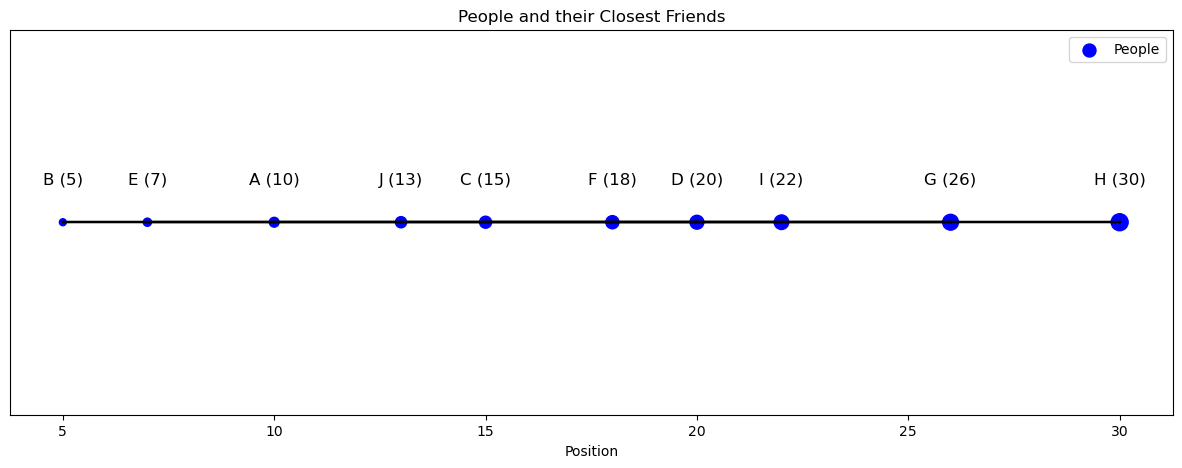

In [27]:
import heapq
import matplotlib.pyplot as plt

def find_five_friends(people):
    # 创建一个字典来存储每个人的朋友及其距离
    friends = {}

    # 遍历每个人
    for name, position in people:
        # 使用最小堆来存储离当前人位置最近的5个人
        closest_friends = []

        # 遍历其他人，计算距离并添加到最小堆中
        for other_name, other_position in people:
            # 不包括当前人
            if other_name != name:
                # 计算当前人与其他人的距离
                distance = abs(position - other_position)
                # 如果堆中不足5个人或者当前人与该人的距离比堆中最远的距离小，则添加到堆中
                if len(closest_friends) < 5:
                    heapq.heappush(closest_friends, (-distance, other_name))
                elif distance < -closest_friends[0][0]:
                    heapq.heappop(closest_friends)
                    heapq.heappush(closest_friends, (-distance, other_name))

        # 从最小堆中提取最接近的5个朋友及其距离
        closest_friends = [(-friend[0], friend[1]) for friend in closest_friends]
        # 存储到字典中
        friends[name] = closest_friends

    return friends

# 定义所有人的名字信息，并用算法找到朋友
people = [("A", 10), ("B", 5), ("C", 15), ("D", 20), ("E", 7),("F",18),("G",26),('H',30),('I',22),('J',13)]
result = find_five_friends(people)

# 输出每个人及其最近的五个朋友信息
print("人名\t\t最近的五个朋友")
for person, friends in result.items():
    print(f"{person}:\t", end="")
    for distance, friend in friends:
        print(f"{friend} (距离: {distance}), ", end="")
    print()
    print("-" * 70)

# 画出每个人的位置
names = [person[0] for person in people]
positions = [person[1] for person in people]
sizes = [position*5 for position in positions]  # 点的大小与位置成正比
plt.figure(figsize=(15,5))
plt.scatter(positions, [0]*len(positions), s=sizes, label="People", color='blue')

# 标记每个人的名字和位置大小
for name, position, size in zip(names, positions, sizes):
    plt.text(position, 0.01, f"{name} ({position})", fontsize=12, ha='center', va='bottom')

for person, friends in result.items():
    for distance, friend in friends:
        plt.plot([people[names.index(person)][1], people[names.index(friend)][1]], [0, 0], color='black')

plt.xlabel('Position')
plt.title('People and their Closest Friends')
plt.yticks([])
plt.legend()
plt.show()